In [20]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv("gapminder-scaled.csv")

X = df.drop(columns=['country', 'lex','cm'])
y = df['lex']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.neural_network import MLPRegressor

In [9]:

model = MLPRegressor(
    hidden_layer_sizes=(512,256, 128, 64),  
    activation='relu',
    solver='adam',
    alpha=0.0001,             
    learning_rate='adaptive',
    learning_rate_init=0.000001,
    max_iter=10000,
    random_state=87,
    early_stopping=True,
    n_iter_no_change=200,
    tol=1e-5,
    verbose=True
)


model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Iteration 1, loss = 0.08980909
Validation score: -4.389764
Iteration 2, loss = 0.08972999
Validation score: -4.384428
Iteration 3, loss = 0.08965090
Validation score: -4.379095
Iteration 4, loss = 0.08957183
Validation score: -4.373766
Iteration 5, loss = 0.08949280
Validation score: -4.368404
Iteration 6, loss = 0.08941376
Validation score: -4.363044
Iteration 7, loss = 0.08933481
Validation score: -4.357704
Iteration 8, loss = 0.08925589
Validation score: -4.352370
Iteration 9, loss = 0.08917705
Validation score: -4.347038
Iteration 10, loss = 0.08909822
Validation score: -4.341709
Iteration 11, loss = 0.08901938
Validation score: -4.336383
Iteration 12, loss = 0.08894055
Validation score: -4.331042
Iteration 13, loss = 0.08886176
Validation score: -4.325697
Iteration 14, loss = 0.08878302
Validation score: -4.320355
Iteration 15, loss = 0.08870433
Validation score: -4.315017
Iteration 16, loss = 0.08862568
Validation score: -4.309683
Iteration 17, loss = 0.08854707
Validation score:

In [22]:
from sklearn.ensemble import RandomForestRegressor

R² Score: 0.8834140846018566
RMSE: 0.06541322256069479


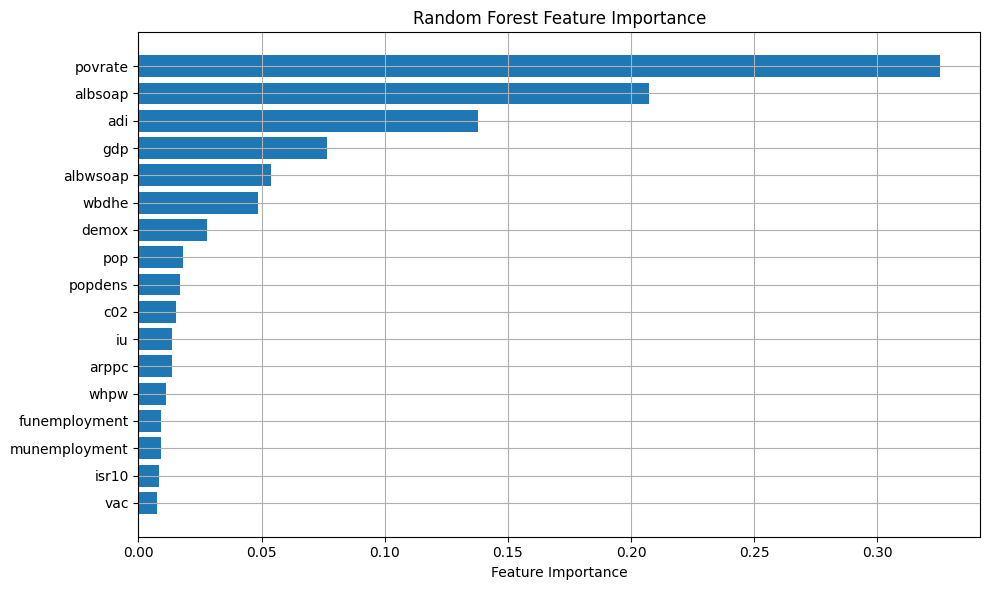

In [24]:
model = RandomForestRegressor(random_state=39)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


importances = model.feature_importances_
features = X.columns


importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)



plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()


In [23]:
parameters = {'random_state':range(10,42)}
rfr = RandomForestRegressor()
clf = GridSearchCV(rfr, parameters)
clf.fit(X_train, y_train)


GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'random_state': range(10, 42)})

In [2]:
import xgboost as xgb
from xgboost import XGBRegressor

R² Score: 0.8639313744199648
RMSE: 0.07066778849431134


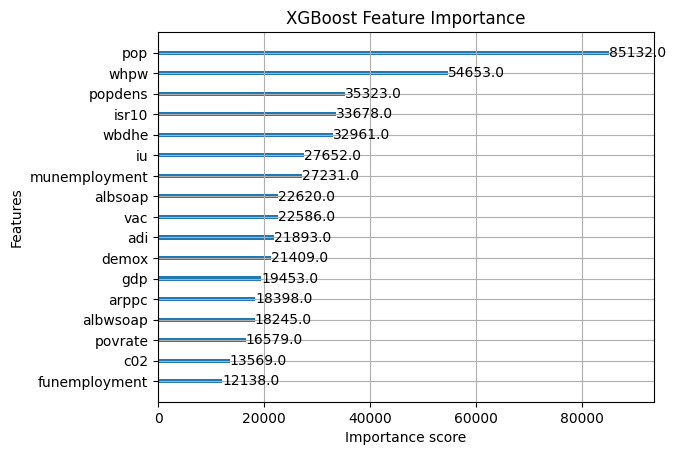

In [6]:
model = XGBRegressor(
    n_estimators=15000,
    max_depth=7,
    learning_rate=0.0005,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

xgb.plot_importance(model)
plt.title("XGBoost Feature Importance")
plt.show()

In [4]:
from sklearn.neighbors import KNeighborsRegressor

In [19]:
model = KNeighborsRegressor(
    n_neighbors=12,      
    weights='distance', 
    algorithm='ball_tree'
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R² Score: 0.8443125023750717
RMSE: 0.0755908746732813


In [1]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [16]:

parameters = {'n_neighbors':range(3,13), 'weights':('uniform','distance'), 'algorithm':('ball_tree', 'kd_tree', 'brute'),'leaf_size':range(15,25)}
knn = KNeighborsRegressor()
clf = GridSearchCV(knn, parameters)
clf.fit(X_train, y_train)


GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ('ball_tree', 'kd_tree', 'brute'),
                         'leaf_size': range(15, 25),
                         'n_neighbors': range(3, 13),
                         'weights': ('uniform', 'distance')})